## 1. 전복 데이터를 가지고 딥러닝 분류를 수행

In [114]:
import pandas as pd
import numpy as np

In [115]:
df = pd.read_csv("../abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [116]:
X=df.drop('Rings',axis=1)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
id,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,True,False


In [117]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [118]:
X = X.values
X.shape

(4177, 9)

In [119]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [126]:
print(X.dtype)
print(Y.dtype)

float32
float32


In [127]:
X = X.astype('float32')

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [129]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(64,input_shape=(9,),activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(30,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                640       
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 30)                990       
                                                                 
Total params: 3,710
Trainable params: 3,710
Non-trainable params: 0
_________________________________________________________________


In [130]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 [==============================] - 1s 3ms/step - loss: 2.4048 - accuracy: 0.2086 - val_loss: 2.4362 - val_accuracy: 0.1914
Epoch 2/30
105/105 [==============================] - 0s 1ms/step - loss: 2.3058 - accuracy: 0.2221 - val_loss: 2.4432 - val_accuracy: 0.1998
Epoch 3/30
105/105 [==============================] - 0s 2ms/step - loss: 2.2802 - accuracy: 0.2284 - val_loss: 2.2289 - val_accuracy: 0.2105
Epoch 4/30
105/105 [==============================] - 0s 2ms/step - loss: 2.2566 - accuracy: 0.2269 - val_loss: 2.1445 - val_accuracy: 0.2452
Epoch 5/30
105/105 [==============================] - 0s 2ms/step - loss: 2.2541 - accuracy: 0.2179 - val_loss: 2.2413 - val_accuracy: 0.2177
Epoch 6/30
105/105 [==============================] - 0s 1ms/step - loss: 2.2278 - accuracy: 0.2323 - val_loss: 2.3547 - val_accuracy: 0.2033
Epoch 7/30
105/105 [==============================] - 0s 1ms/step - loss: 2.2177 - accuracy: 0.2140 - val_loss: 2.3234 - val_accuracy: 0.2022
Epoch 

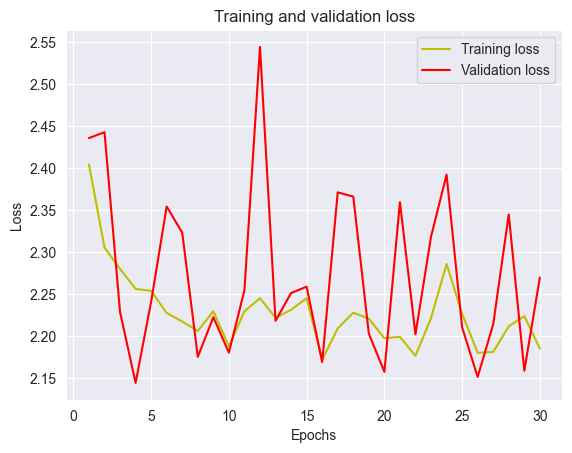

In [131]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

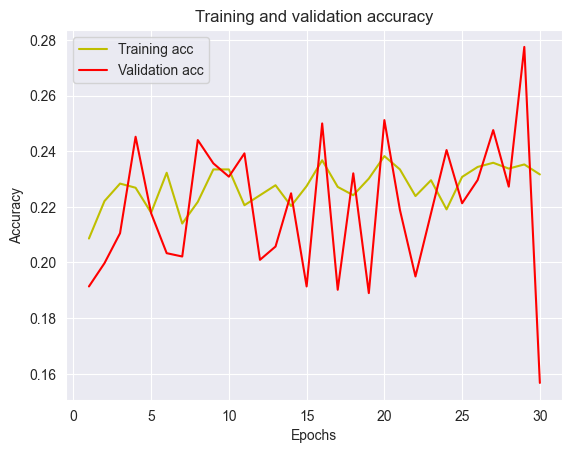

In [132]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [133]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.28      0.73      0.40        11
           5       0.00      0.00      0.00        33
           6       0.16      0.79      0.26        47
           7       0.20      0.02      0.04        98
           8       0.00      0.00      0.00       113
           9       0.17      0.01      0.02       127
          10       0.00      0.00      0.00       107
          11       0.17      0.84      0.28        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.04      0.30      0.06        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    